In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
train_db = pd.read_csv('train.csv')
test_db = pd.read_csv('test.csv')

In [11]:
train_db.shape

(891, 12)

In [12]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
test_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<Axes: xlabel='Sex', ylabel='count'>

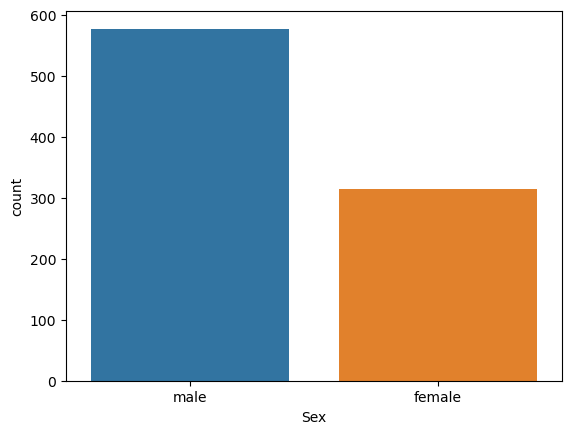

In [14]:
sns.countplot(x='Sex', data= train_db)

<Axes: xlabel='Pclass', ylabel='count'>

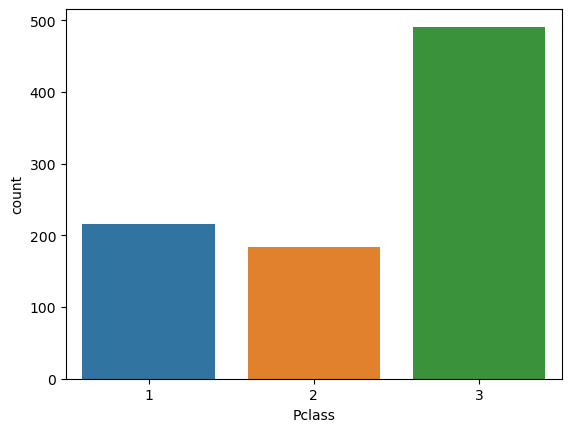

In [15]:
sns.countplot(x='Pclass', data = train_db)

<Axes: xlabel='Pclass', ylabel='count'>

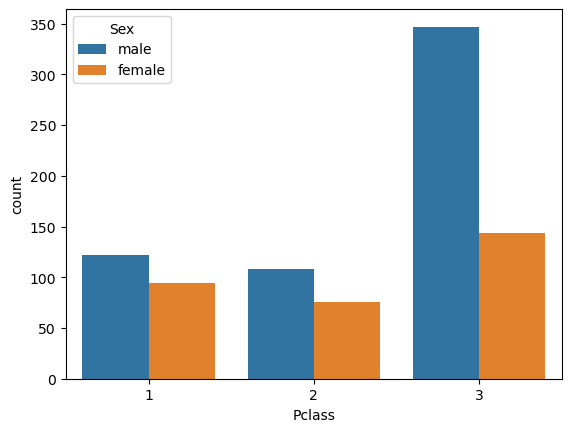

In [16]:
sns.countplot(x='Pclass', data = train_db, hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

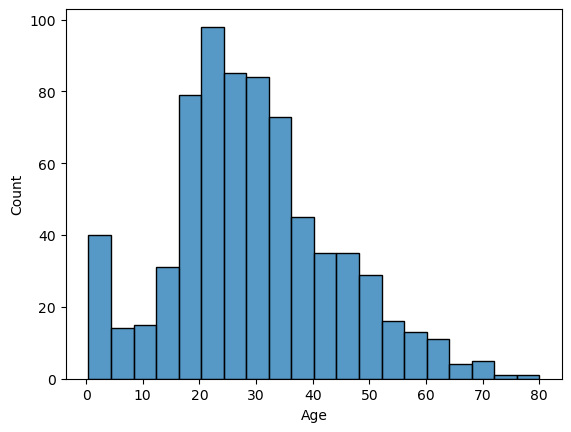

In [17]:
sns.histplot(train_db['Age'])

In [18]:
train_db.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
columns_test =test_db.columns + ["Survived"]
y_test = pd.concat([test_db, pd.read_csv("gender_submission.csv")['Survived']], axis=1)

In [20]:
dataset = pd.concat([train_db , y_test], axis=0)


In [21]:
dataset['Survived'].unique()

array([0, 1])

In [22]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
test_db.shape

(418, 11)

In [24]:
test_db.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
dataset["Along"] = dataset['SibSp'] + dataset['Parch']
dataset[:-5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,0
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,2
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,0
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1


<Axes: xlabel='Pclass', ylabel='count'>

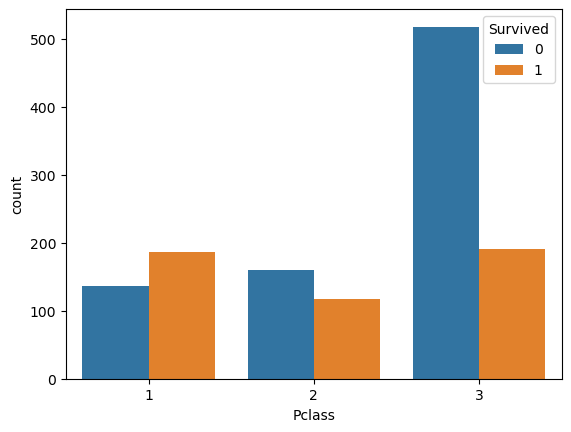

In [26]:
sns.countplot(x='Pclass' , data=dataset, hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

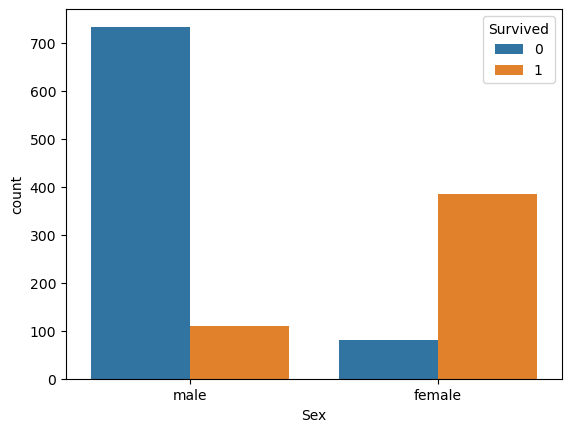

In [27]:
sns.countplot(x='Sex', data=dataset, hue='Survived')

In [28]:
dataset.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

In [29]:
dataset['Sex'] = np.where(dataset["Sex"] == 'male', 1, 0)

<Axes: >

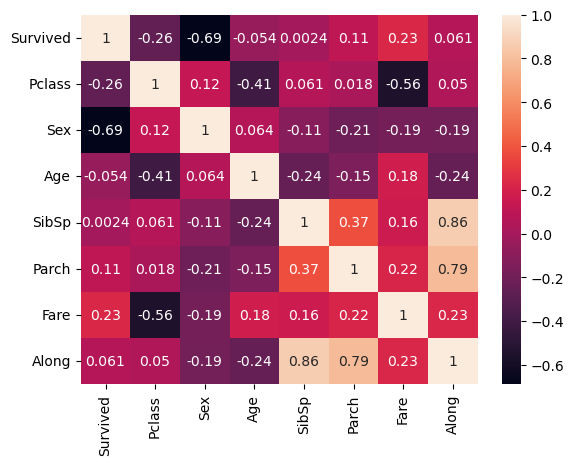

In [30]:
sns.heatmap(dataset.corr(), annot=True)

In [31]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Along         0
dtype: int64

In [32]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Along         0
dtype: int64

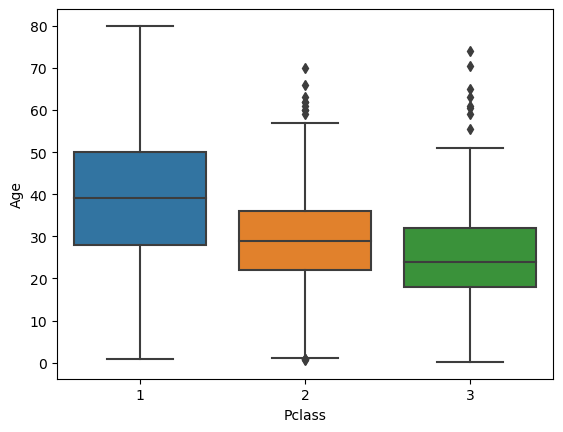

In [33]:
sns.boxplot(x='Pclass', y='Age', data= dataset)
plt.show()

In [34]:
avg_1 = dataset[dataset['Pclass'] == 1]['Age'].mean()
avg_3 = dataset[dataset['Pclass'] == 3]['Age'].mean()
avg_2 = dataset[dataset['Pclass'] == 2]['Age'].mean()


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Along     1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 92.0 KB


In [36]:
# def fill_age(age, avg):
#     if pd.isnull(age):
#         return avg
#     else:
#         return age


In [37]:
# dataset.loc[dataset.query('Pclass==1 and Age==Nan').index, 'Age']
dataset.loc[dataset['Age'].isnull() & dataset['Pclass'] == 1]['Age'] = avg_1
dataset.loc[dataset['Age'].isnull() & dataset['Pclass'] == 2]['Age'] = avg_2
dataset.loc[dataset['Age'].isnull() & dataset['Pclass'] == 3]['Age'] = avg_3



In [38]:
dataset['Survived'].unique()

array([0, 1])

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Along     1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 92.0 KB


In [40]:
X = np.array(dataset.drop(columns=['Survived']), dtype=np.int16)
y = np.array(dataset['Survived'], dtype=np.int16)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


In [43]:
X_train.shape

(1047, 7)

In [44]:
model = DecisionTreeClassifier(criterion='gini', max_depth=5)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [45]:
model.score(X_test, Y_test)

0.8129770992366412

In [46]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [47]:
confusion_matrix(y_pred=y_pred, y_true=Y_test)

array([[139,  21],
       [ 28,  74]])

In [48]:
classification_report(y_pred=y_pred, y_true=Y_test)

'              precision    recall  f1-score   support\n\n           0       0.83      0.87      0.85       160\n           1       0.78      0.73      0.75       102\n\n    accuracy                           0.81       262\n   macro avg       0.81      0.80      0.80       262\nweighted avg       0.81      0.81      0.81       262\n'

In [49]:
f1_score(y_pred=y_pred, y_true=Y_test)

0.751269035532995

In [50]:
from sklearn import tree

[Text(0.49, 0.9166666666666666, 'x[1] <= 0.5\ngini = 0.468\nsamples = 1047\nvalue = [655, 392]'),
 Text(0.21, 0.75, 'x[0] <= 2.5\ngini = 0.275\nsamples = 371\nvalue = [61, 310]'),
 Text(0.08, 0.5833333333333334, 'x[5] <= 22.0\ngini = 0.039\nsamples = 201\nvalue = [4, 197]'),
 Text(0.04, 0.4166666666666667, 'x[2] <= 23.5\ngini = 0.127\nsamples = 44\nvalue = [3, 41]'),
 Text(0.02, 0.25, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.06, 0.25, 'x[2] <= 27.5\ngini = 0.18\nsamples = 30\nvalue = [3, 27]'),
 Text(0.04, 0.08333333333333333, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.08, 0.08333333333333333, 'gini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.12, 0.4166666666666667, 'x[6] <= 2.5\ngini = 0.013\nsamples = 157\nvalue = [1, 156]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 137\nvalue = [0, 137]'),
 Text(0.14, 0.25, 'x[5] <= 135.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.12, 0.08333333333333333, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0

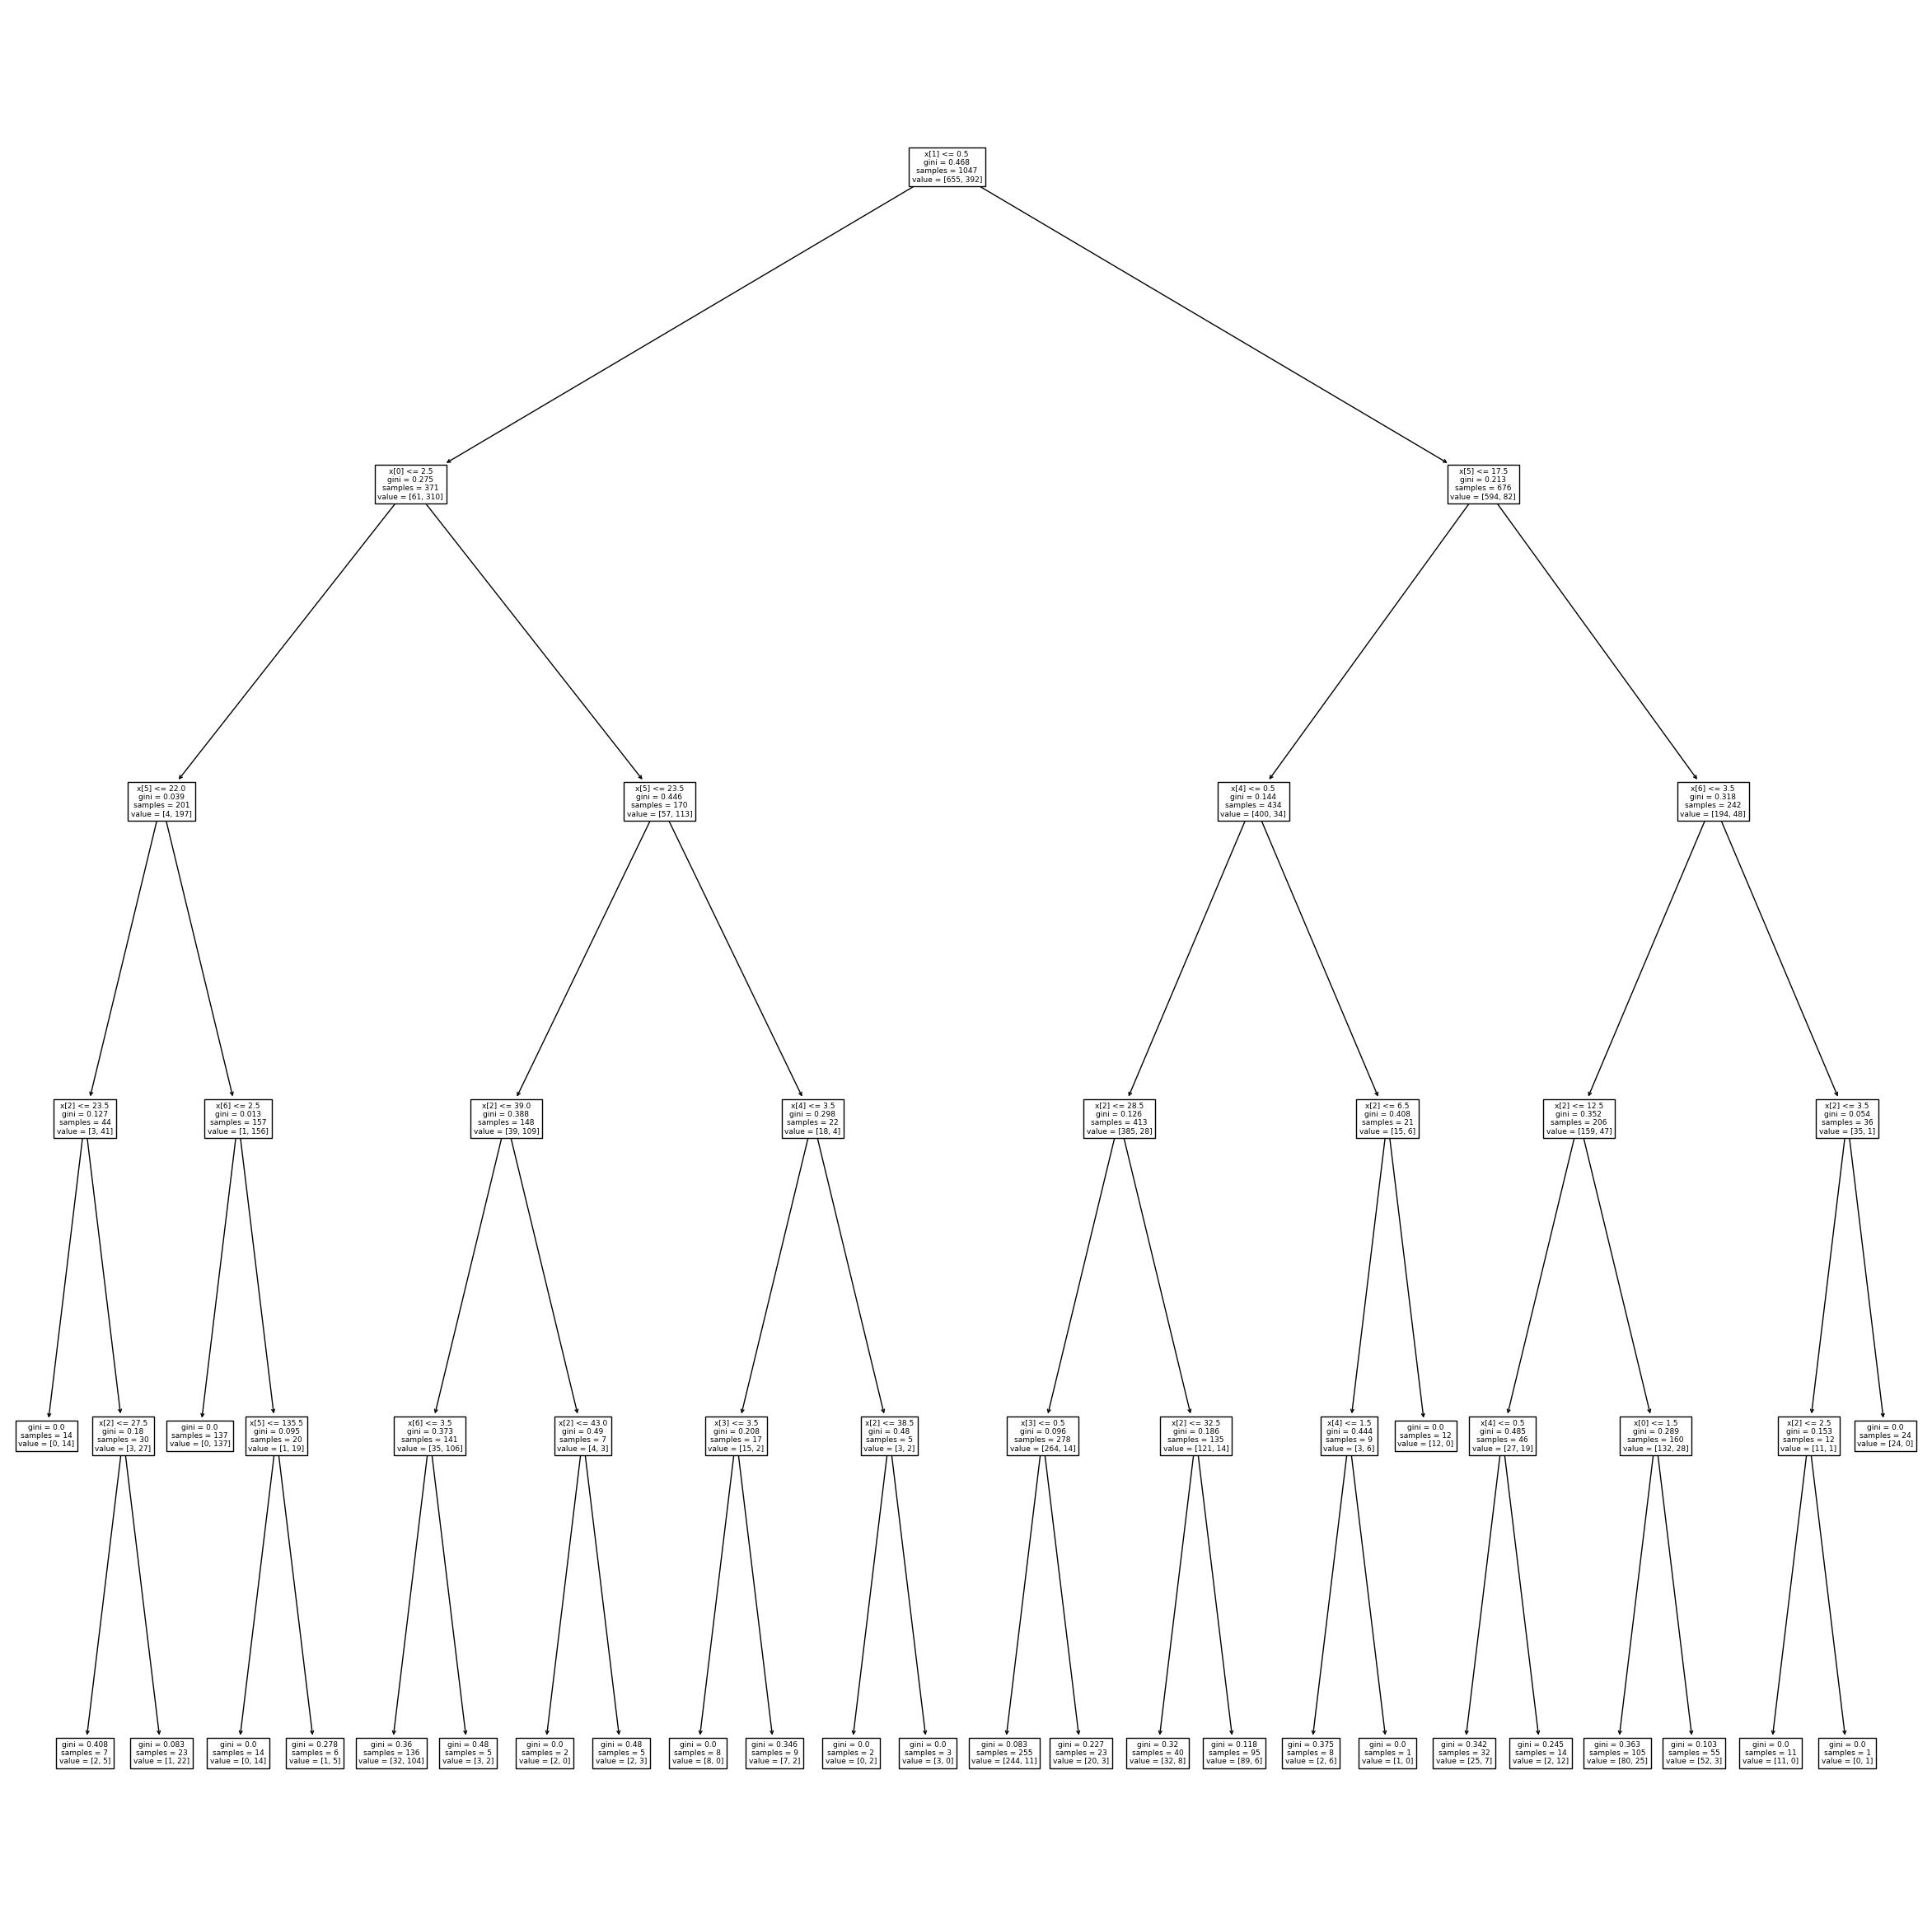

In [51]:
plt.figure(figsize=(30,30))
tree.plot_tree(model)